# Input module examples

To do:

- incorporate pint and show how to do units stuff

In [1]:
%matplotlib inline

from os import listdir
from os.path import join, dirname
from pprint import pprint

import pandas as pd
import pymagicc
from pymagicc.io import MAGICCData, read_cfg_file, NoReaderWriterError
import matplotlib.pyplot as plt
plt.style.use('bmh') 

import expectexception

<IPython.core.display.Javascript object>

In [2]:
MAGICC6_DIR = join("..", "pymagicc", "MAGICC6", "run")
TEST_DATA_DIR = join("..", "tests", "test_data")

## Read files

In [3]:
mdata = MAGICCData(
    join(MAGICC6_DIR, "HISTRCP_CO2I_EMIS.IN"),
    scenario="Historical",
)
mdata.head()

,variable,todo,unit,region,climate_model,model,scenario,time,value
484,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|R5ASIA,unspecified,unspecified,Historical,1765-07-12,0.000
968,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|R5LAM,unspecified,unspecified,Historical,1765-07-12,0.000
726,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|R5MAF,unspecified,unspecified,Historical,1765-07-12,0.000
0,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|R5OECD,unspecified,unspecified,Historical,1765-07-12,0.003
242,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|R5REF,unspecified,unspecified,Historical,1765-07-12,0.000


In [4]:
pprint(mdata.metadata)

{'contact': 'Base year emissions inventories: Steve Smith (ssmith@pnl.gov) and '
            'Jean-Francois Lamarque (Jean-Francois.Lamarque@noaa.gov); RCP '
            '3-PD (IMAGE): Detlef van Vuuren (detlef.vanvuuren@pbl.nl); RCP '
            '4.5 (MiniCAM): Allison Thomson (Allison.Thomson@pnl.gov); RCP 6.0 '
            '(AIM): Toshihiko Masui (masui@nies.go.jp); RCP 8.5 (MESSAGE): '
            'Keywan Riahi (riahi@iiasa.ac.at); Concentrations & Forcing '
            'compilation: Malte Meinshausen (malte.meinshausen@pik-potsdam.de)',
 'data': 'Historical fossil&industrial CO2 (CO2I) Emissions '
         '(HISTRCP_CO2I_EMIS)',
 'header': 'RCPTOOL - MAGICC 6.X DATA FILE \r\n'
           'VERSION:   ALPHA - FIRST DRAFT - PRIMAP xls file written on 02 Sep '
           '2009, 17:04:37 \r\n'
           ' \r\n'
           ' \r\n'
           'DATA:  Historical fossil&industrial CO2 (CO2I) Emissions '
           '(HISTRCP_CO2I_EMIS) \r\n'
           'SOURCE:  RCP data as presented on '

## Filtering

As we're built on top of Pyam's IamDataFrame, we get access to all of its filtering capabilities too.

In [5]:
mdata.filter(region="*R5ASIA").head()

,variable,todo,unit,region,climate_model,model,scenario,time,value
484,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|R5ASIA,unspecified,unspecified,Historical,1765-07-12,0.0
485,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|R5ASIA,unspecified,unspecified,Historical,1766-07-12,0.0
486,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|R5ASIA,unspecified,unspecified,Historical,1767-07-12,0.0
487,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|R5ASIA,unspecified,unspecified,Historical,1768-07-12,0.0
488,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|R5ASIA,unspecified,unspecified,Historical,1769-07-12,0.0


### Reading SCEN files

We can also read SCEN files. These are particularly tricky as the underlying data format is unique.

In [6]:
mdata.append(
    join(MAGICC6_DIR, "RCP45.SCEN"),
    scenario="RCP45",
    model="MiniCAM",
)
mdata.head()

,model,scenario,region,variable,unit,time,todo,climate_model,value
0,unspecified,Historical,World|R5ASIA,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr,1765-07-12 00:00:00,SET,unspecified,0.000
1,unspecified,Historical,World|R5LAM,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr,1765-07-12 00:00:00,SET,unspecified,0.000
2,unspecified,Historical,World|R5MAF,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr,1765-07-12 00:00:00,SET,unspecified,0.000
3,unspecified,Historical,World|R5OECD,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr,1765-07-12 00:00:00,SET,unspecified,0.003
4,unspecified,Historical,World|R5REF,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr,1765-07-12 00:00:00,SET,unspecified,0.000


In [7]:
mdata.filter(
    variable="*BC",
    region="*ASIA"
).head()

,model,scenario,region,variable,unit,time,todo,climate_model,value
1212,MiniCAM,RCP45,World|R5ASIA,Emissions|BC,Mt BC / yr,2000-07-12 00:00:00,SET,unspecified,3.0468
1219,MiniCAM,RCP45,World|R5ASIA,Emissions|BC,Mt BC / yr,2001-07-12 00:00:00,SET,unspecified,3.1090
1226,MiniCAM,RCP45,World|R5ASIA,Emissions|BC,Mt BC / yr,2002-07-12 00:00:00,SET,unspecified,3.1818
1233,MiniCAM,RCP45,World|R5ASIA,Emissions|BC,Mt BC / yr,2003-07-12 00:00:00,SET,unspecified,3.2546
1240,MiniCAM,RCP45,World|R5ASIA,Emissions|BC,Mt BC / yr,2004-07-12 00:00:00,SET,unspecified,3.3274


### Reading RCP data files

We can also read the RCP data files provided at http://www.pik-potsdam.de/~mmalte/rcps/. These are also tricky as the underlying data format is unique.

In [8]:
mdata.append(
    join(TEST_DATA_DIR, "RCP3PD_EMISSIONS.DAT"),
    model="IMAGE",
    scenario="RCP26"
)
mdata.head()

,model,scenario,region,variable,unit,time,todo,climate_model,value
0,unspecified,Historical,World|R5ASIA,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr,1765-07-12 00:00:00,SET,unspecified,0.000
1,unspecified,Historical,World|R5LAM,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr,1765-07-12 00:00:00,SET,unspecified,0.000
2,unspecified,Historical,World|R5MAF,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr,1765-07-12 00:00:00,SET,unspecified,0.000
3,unspecified,Historical,World|R5OECD,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr,1765-07-12 00:00:00,SET,unspecified,0.003
4,unspecified,Historical,World|R5REF,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr,1765-07-12 00:00:00,SET,unspecified,0.000


In [9]:
mdata.variables()

0     Emissions|CO2|MAGICC Fossil and Industrial
1                                   Emissions|BC
2                                 Emissions|C2F6
3                                Emissions|C6F14
4                                  Emissions|CF4
5                                  Emissions|CH4
6                                   Emissions|CO
7                     Emissions|CO2|MAGICC AFOLU
8                               Emissions|HFC125
9                              Emissions|HFC134a
10                             Emissions|HFC143a
11                            Emissions|HFC227ea
12                               Emissions|HFC23
13                            Emissions|HFC245fa
14                               Emissions|HFC32
15                             Emissions|HFC4310
16                                 Emissions|N2O
17                                 Emissions|NH3
18                               Emissions|NMVOC
19                                 Emissions|NOx
20                  

In [10]:
mdata.append(
    join(TEST_DATA_DIR, "RCP3PD_MIDYEAR_CONCENTRATIONS.DAT"),
    model="IMAGE",
    scenario="RCP26",
    climate_model="MAGICC6"
)
mdata.head()

,model,scenario,region,variable,unit,time,todo,climate_model,value
0,unspecified,Historical,World|R5ASIA,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr,1765-07-12 00:00:00,SET,unspecified,0.000
1,unspecified,Historical,World|R5LAM,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr,1765-07-12 00:00:00,SET,unspecified,0.000
2,unspecified,Historical,World|R5MAF,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr,1765-07-12 00:00:00,SET,unspecified,0.000
3,unspecified,Historical,World|R5OECD,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr,1765-07-12 00:00:00,SET,unspecified,0.003
4,unspecified,Historical,World|R5REF,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr,1765-07-12 00:00:00,SET,unspecified,0.000


In [11]:
mdata.variables()

0            Emissions|CO2|MAGICC Fossil and Industrial
1                                          Emissions|BC
2                                        Emissions|C2F6
3                                       Emissions|C6F14
4                                         Emissions|CF4
5                                         Emissions|CH4
6                                          Emissions|CO
7                            Emissions|CO2|MAGICC AFOLU
8                                      Emissions|HFC125
9                                     Emissions|HFC134a
10                                    Emissions|HFC143a
11                                   Emissions|HFC227ea
12                                      Emissions|HFC23
13                                   Emissions|HFC245fa
14                                      Emissions|HFC32
15                                    Emissions|HFC4310
16                                        Emissions|N2O
17                                        Emissi

In [12]:
mdata.append(
    join(TEST_DATA_DIR, "RCP3PD_MIDYEAR_RADFORCING.DAT"),
    model="IMAGE",
    scenario="RCP26",
    climate_model="MAGICC6"
)
mdata.head()

,model,scenario,region,variable,unit,time,todo,climate_model,value
0,unspecified,Historical,World|R5ASIA,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr,1765-07-12 00:00:00,SET,unspecified,0.000
1,unspecified,Historical,World|R5LAM,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr,1765-07-12 00:00:00,SET,unspecified,0.000
2,unspecified,Historical,World|R5MAF,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr,1765-07-12 00:00:00,SET,unspecified,0.000
3,unspecified,Historical,World|R5OECD,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr,1765-07-12 00:00:00,SET,unspecified,0.003
4,unspecified,Historical,World|R5REF,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr,1765-07-12 00:00:00,SET,unspecified,0.000


In [13]:
mdata.variables()

0             Emissions|CO2|MAGICC Fossil and Industrial
1                                           Emissions|BC
2                                         Emissions|C2F6
3                                        Emissions|C6F14
4                                          Emissions|CF4
5                                          Emissions|CH4
6                                           Emissions|CO
7                             Emissions|CO2|MAGICC AFOLU
8                                       Emissions|HFC125
9                                      Emissions|HFC134a
10                                     Emissions|HFC143a
11                                    Emissions|HFC227ea
12                                       Emissions|HFC23
13                                    Emissions|HFC245fa
14                                       Emissions|HFC32
15                                     Emissions|HFC4310
16                                         Emissions|N2O
17                             

### Reading all files in run directory

The lines below show how you can read every file in the run directory into a dictionary, should you wish to.

In [14]:
all_run_files = {}

for file in listdir(MAGICC6_DIR):
    
    if file.endswith((".exe")):
        continue
    elif file.endswith(".CFG"):
        all_run_files[file] = read_cfg_file(
            join(MAGICC6_DIR, file)
        )
    else:   
        all_run_files[file] = MAGICCData(join(MAGICC6_DIR, file))

In [15]:
sorted(all_run_files.keys())

['EDGAR_NOXB_EMIS.IN',
 'EDGAR_NOXI_EMIS.IN',
 'GISS_BCB_OT.IN',
 'GISS_BCB_RF.IN',
 'GISS_BCI_OT.IN',
 'GISS_BCI_RF.IN',
 'GISS_BCSNOW_RF.IN',
 'GISS_LANDUSE_RF.IN',
 'GISS_NOX_RF.IN',
 'GISS_OCB_OT.IN',
 'GISS_OCB_RF.IN',
 'GISS_OCI_OT.IN',
 'GISS_OCI_RF.IN',
 'GISS_OCN_OT.IN',
 'GISS_SOXI_OT.IN',
 'GISS_SOXNB_OT.IN',
 'GISS_SOX_RF.IN',
 'GISS_SS_OT.IN',
 'HISTRCP2009_SOLAR_RF.IN',
 'HISTRCP45SCP45to3PD_SOLAR_RF.IN',
 'HISTRCP45_SOLAR_RF.IN',
 'HISTRCP60_2300_SOLAR_RF.IN',
 'HISTRCP6SCP6to45_SOLAR_RF.IN',
 'HISTRCP6_SOLAR_RF.IN',
 'HISTRCP85_SOLAR_RF.IN',
 'HISTRCP_BCB_EMIS.IN',
 'HISTRCP_BCI_EMIS.IN',
 'HISTRCP_C2F6_CONC.IN',
 'HISTRCP_C2F6_EMIS.IN',
 'HISTRCP_C6F14I_EMIS.IN',
 'HISTRCP_C6F14_CONC.IN',
 'HISTRCP_C6F14_EMIS.IN',
 'HISTRCP_CF4_CONC.IN',
 'HISTRCP_CF4_EMIS.IN',
 'HISTRCP_CH4B_EMIS.IN',
 'HISTRCP_CH4I_EMIS.IN',
 'HISTRCP_CH4_CONC.IN',
 'HISTRCP_CO2B_EMIS.IN',
 'HISTRCP_CO2I_EMIS.IN',
 'HISTRCP_CO2_CONC.IN',
 'HISTRCP_COB_EMIS.IN',
 'HISTRCP_COI_EMIS.IN',
 'HISTRCP_HFC12

In [16]:
all_run_files["SRESB2.SCEN"].head()

,variable,todo,unit,region,climate_model,model,scenario,time,value
108,Emissions|C2F6,SET,kt C2F6 / yr,World,unspecified,unspecified,unspecified,1990-07-12,1.5789
108,Emissions|C2F6,SET,kt C2F6 / yr,World|ALM,unspecified,unspecified,unspecified,1990-07-12,0.1907
108,Emissions|C2F6,SET,kt C2F6 / yr,World|ASIA,unspecified,unspecified,unspecified,1990-07-12,0.1600
108,Emissions|C2F6,SET,kt C2F6 / yr,World|OECD90,unspecified,unspecified,unspecified,1990-07-12,0.8858
108,Emissions|C2F6,SET,kt C2F6 / yr,World|REF,unspecified,unspecified,unspecified,1990-07-12,0.3425


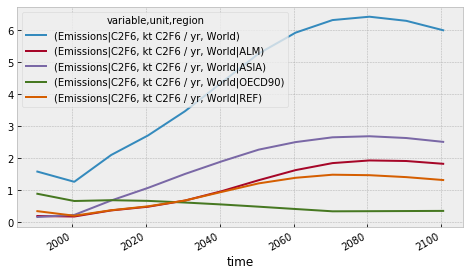

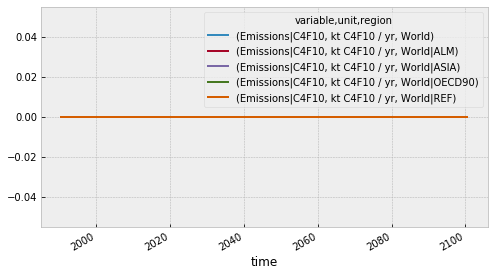

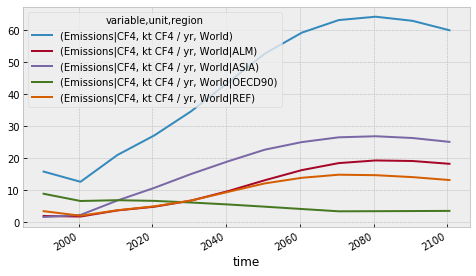

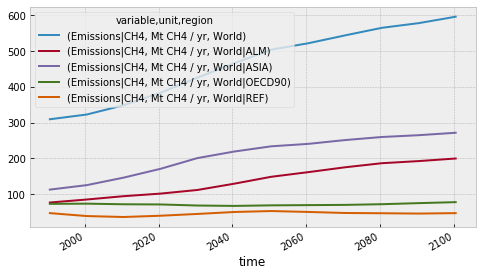

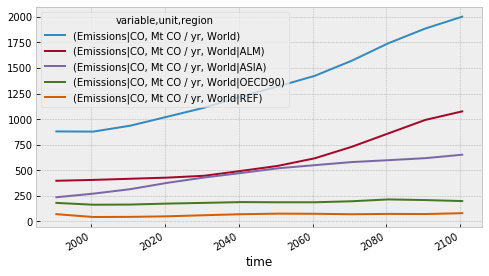

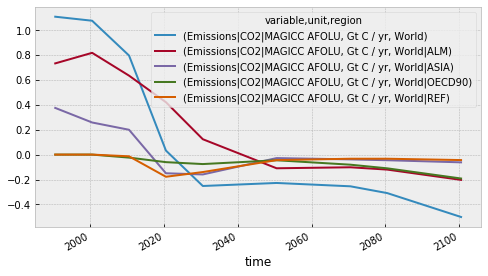

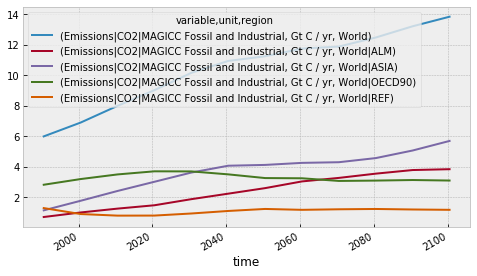

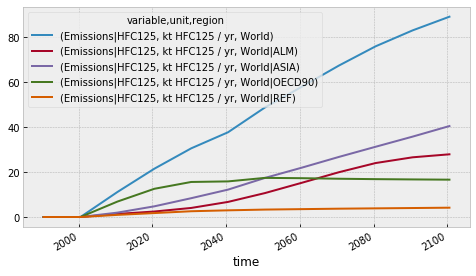

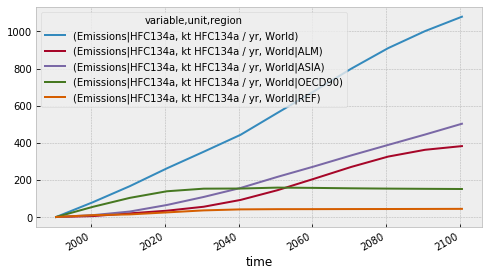

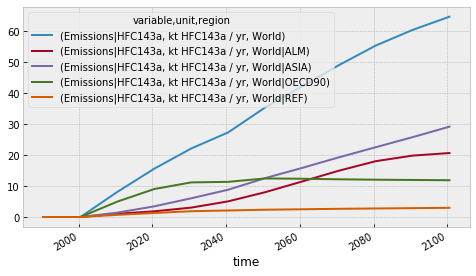

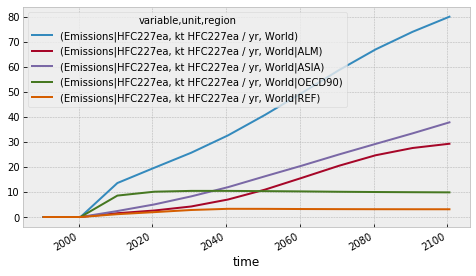

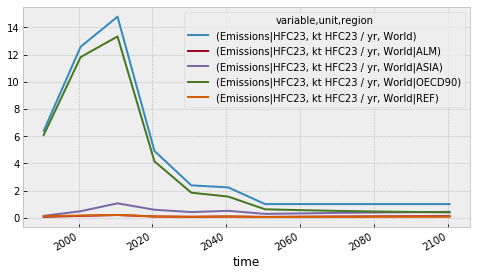

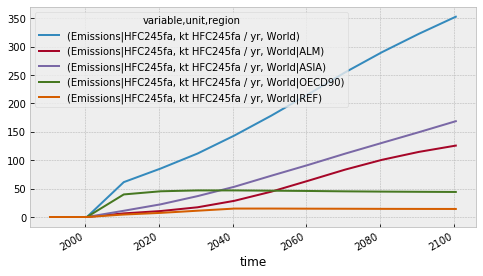

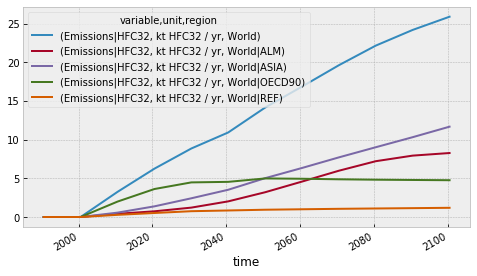

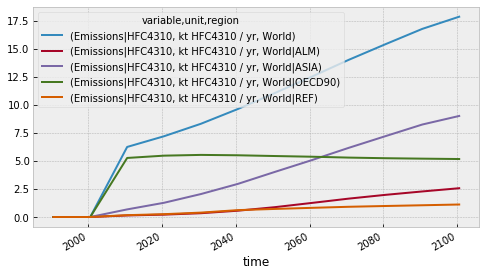

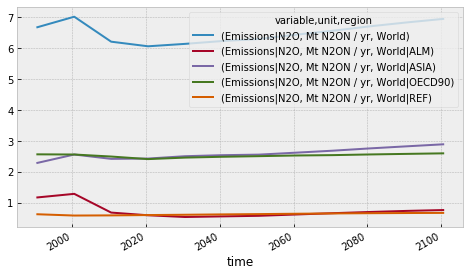

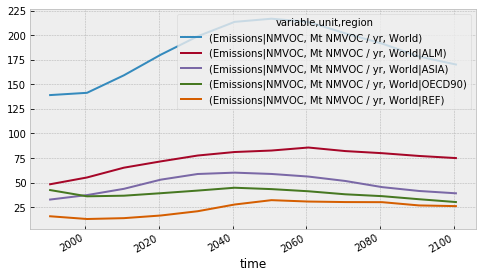

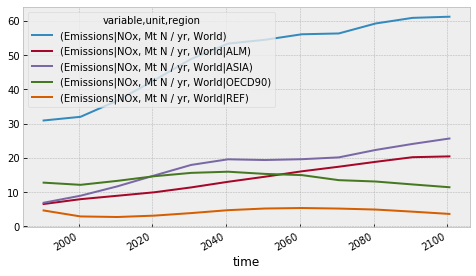

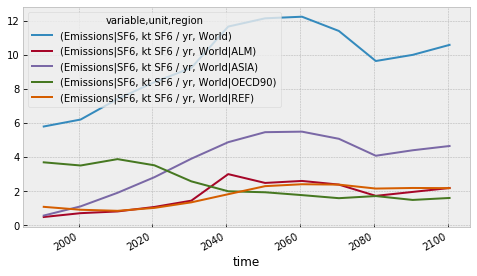

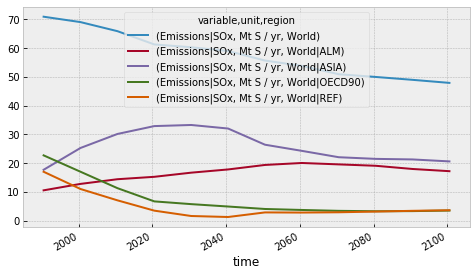

In [17]:
all_run_files["SRESB2.SCEN"].pivot_table(
    index="time", 
    columns=["variable", "unit", "region"], 
    aggfunc="sum"
).groupby(level="variable", axis=1).plot(figsize=(8, 4.5));

## Writing files

Once you have your data in the format as above, writing files is trivial. 

In [18]:
mdata = MAGICCData(join(MAGICC6_DIR, "HISTRCP_CO2I_EMIS.IN"))
mdata.write("HISTEXAMPLE_CO2I_EMIS.IN", magicc_version=7)

mdata = MAGICCData(join(MAGICC6_DIR, "RCP45.SCEN"))
mdata.write("SCENEXAMPLE.SCEN", magicc_version=7)

However, note that the format to write in is determined by the filename. Hence you can't just use any filename, it has to follow MAGICC's internal conventions, see [the docs](https://pymagicc.readthedocs.io/en/latest/file_conventions.html). Our error messaging will hopefully make this slightly clearer.

In [19]:
%%expect_exception NoReaderWriterError
mdata.write("histexample.txt", magicc_version=7)

---------------------------------------------------------------------------
NoReaderWriterError                       Traceback (most recent call last)
<ipython-input-19-20ac4c194f29> in <module>
----> 1 mdata.write("histexample.txt", magicc_version=7)

~/Documents/AGCEC/MCastle/pymagicc/pymagicc/io.py in write(self, filepath, magicc_version)
   1966             for.
   1967         """
-> 1968         writer = determine_tool(filepath, "writer")(magicc_version=magicc_version)
   1969         writer.write(self, filepath)
   1970 

~/Documents/AGCEC/MCastle/pymagicc/pymagicc/io.py in determine_tool(filepath, tool_to_get)
   2103         )
   2104 
-> 2105     raise NoReaderWriterError(error_msg)
   2106 
   2107 

NoReaderWriterError: Couldn't find appropriate writer for histexample.txt.
The file must be one of the following types and the filepath must match its corresponding regular expression:
SCEN: ^.*\.SCEN$
SCEN7: ^.*\.SCEN7$
prn: ^.*\.prn$
EmisIn: ^.*\_EMIS.*\.IN$
ConcIn: ^.*\_CONC